In [11]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

Label: 0 (Positive), 1 (Neutral), 2 (Negative)

In [17]:
df = pd.read_csv("dataset/INA_TweetsPPKM_Labeled_Pure.csv", sep="\t")
df.head()

Date           User  \
0  2022-03-31 14:32:04+00:00  pikobar_jabar   
1  2022-03-31 09:26:00+00:00     inewsdotid   
2  2022-03-31 05:02:34+00:00      vdvc_talk   
3  2022-03-30 14:23:10+00:00  pikobar_jabar   
4  2022-03-30 11:28:57+00:00      tvOneNews   

                                               Tweet  sentiment  
0  Ketahui informasi pembagian #PPKM di wilayah J...          1  
1  Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...          1  
2  Juru bicara Satgas Covid-19, Wiku Adisasmito m...          1  
3  Ketahui informasi pembagian #PPKM di wilayah J...          1  
4  Kementerian Agama menerbitkan Surat Edaran Nom...          1

berhubungan kolom yang diperlukan sudah tepat, jadi tidak perlu dirubah rubah lagi


In [19]:
df.sentiment.unique()

array([1, 2, 0], dtype=int64)

# Cleaning

## cleaning data

In [20]:
df.shape

(23644, 4)

In [23]:
df.duplicated().sum()

0

In [25]:
df.isna().sum()

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64

In [26]:
df.isnull().sum()

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64

In [28]:
df.head(20)

Date            User  \
0   2022-03-31 14:32:04+00:00   pikobar_jabar   
1   2022-03-31 09:26:00+00:00      inewsdotid   
2   2022-03-31 05:02:34+00:00       vdvc_talk   
3   2022-03-30 14:23:10+00:00   pikobar_jabar   
4   2022-03-30 11:28:57+00:00       tvOneNews   
5   2022-03-30 11:21:18+00:00    lampungpost_   
6   2022-03-30 08:00:19+00:00  akusehatklinik   
7   2022-03-30 04:35:57+00:00  matamilenialID   
8   2022-03-30 04:21:08+00:00   lampungpostid   
9   2022-03-30 03:16:52+00:00       gemaposID   
10  2022-03-29 14:06:45+00:00   pikobar_jabar   
11  2022-03-29 10:36:43+00:00     IDbelasting   
12  2022-03-29 09:05:57+00:00    lampungpost_   
13  2022-03-29 06:52:08+00:00        lensaRTV   
14  2022-03-29 06:13:43+00:00      rri_jember   
15  2022-03-29 06:12:56+00:00  beritajonegoro   
16  2022-03-29 04:17:49+00:00    lampungpost_   
17  2022-03-29 04:04:01+00:00  PerekonomianRI   
18  2022-03-29 04:00:45+00:00         riaupos   
19  2022-03-29 03:53:11+00:00    murianewscom   

                                                Tweet  sentiment  
0   Ketahui informasi pembagian #PPKM di wilayah J...          1  
1   Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...          1  
2   Juru bicara Satgas Covid-19, Wiku Adisasmito m...          1  
3   Ketahui informasi pembagian #PPKM di wilayah J...          1  
4   Kementerian Agama menerbitkan Surat Edaran Nom...          1  
5   Kapasitas tempat ibadah, termasuk masjid, yang...          1  
6   Halo Sobat Sehat\n\nDengan adanya kondisi ini,...          1  
7   Mitigasi Penting untuk Cegah Penyebaran Varian...          1  
8   Sebanyak 5 (lima) kabupaten di Provinsi Lampun...          1  
9   Komentar Satgas Penanganan Covid-19 Tentang Bu...          1  
10  Ketahui informasi pembagian #PPKM di wilayah J...          1  
11  PPKM Kembali Diperpanjang, Ibadah Taraweh dan ...          1  
12  Lampung Barat ditetapkan masuk zona PPKM level...          1  
13  Pemerintah mulai melonggarkan aturan pembatasa...          1  
14              https://t.co/vLsNyBOgDG Terawan #ppkm          1  
15  Masuk PPKM Level 2, Sekolah di Blora Sudah Bol...          1  
16  Pemerintah memperpanjang pemberlakuan pembatas...          1  
17  #BeritaEkon\n\nHai #SahabatEkon\n\nKasus konsi...          1  
18  Kapasitas Tempat Ibadah Mengikuti Level PPKM. ...          1  
19  Blora PPKM Level 2, PTM 100 persen Digelar Lag...          1

In [38]:
def cleaning_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    return text

df["Tweet"] = df["Tweet"].apply(cleaning_text)

0        ketahui informasi pembagian  di wilayah jabar ...
1        tempat ibadah di wilayah ppkm level 1 boleh be...
2        juru bicara satgas covid-19, wiku adisasmito m...
3        ketahui informasi pembagian  di wilayah jabar ...
4        kementerian agama menerbitkan surat edaran nom...
                               ...                        
23639    noelle loses a bet to akarsha and it somehow e...
23640                     they call her... weekeeshee...  
23641    put out what you wanna see more of, amirite ga...
23642    i don't need anybody, i'm fine here on my ownb...
23643    selamat siang sahabat online, nih aku sedikit ...
Name: Tweet, Length: 23644, dtype: object

In [39]:
df.head()

Date           User  \
0  2022-03-31 14:32:04+00:00  pikobar_jabar   
1  2022-03-31 09:26:00+00:00     inewsdotid   
2  2022-03-31 05:02:34+00:00      vdvc_talk   
3  2022-03-30 14:23:10+00:00  pikobar_jabar   
4  2022-03-30 11:28:57+00:00      tvOneNews   

                                               Tweet  sentiment  
0  ketahui informasi pembagian  di wilayah jabar ...          1  
1  tempat ibadah di wilayah ppkm level 1 boleh be...          1  
2  juru bicara satgas covid-19, wiku adisasmito m...          1  
3  ketahui informasi pembagian  di wilayah jabar ...          1  
4  kementerian agama menerbitkan surat edaran nom...          1

In [40]:
df["Tweet"] = df["Tweet"].str.lower()

df.head(10)

Date            User  \
0  2022-03-31 14:32:04+00:00   pikobar_jabar   
1  2022-03-31 09:26:00+00:00      inewsdotid   
2  2022-03-31 05:02:34+00:00       vdvc_talk   
3  2022-03-30 14:23:10+00:00   pikobar_jabar   
4  2022-03-30 11:28:57+00:00       tvOneNews   
5  2022-03-30 11:21:18+00:00    lampungpost_   
6  2022-03-30 08:00:19+00:00  akusehatklinik   
7  2022-03-30 04:35:57+00:00  matamilenialID   
8  2022-03-30 04:21:08+00:00   lampungpostid   
9  2022-03-30 03:16:52+00:00       gemaposID   

                                               Tweet  sentiment  
0  ketahui informasi pembagian  di wilayah jabar ...          1  
1  tempat ibadah di wilayah ppkm level 1 boleh be...          1  
2  juru bicara satgas covid-19, wiku adisasmito m...          1  
3  ketahui informasi pembagian  di wilayah jabar ...          1  
4  kementerian agama menerbitkan surat edaran nom...          1  
5  kapasitas tempat ibadah, termasuk masjid, yang...          1  
6  halo sobat sehat\n\ndengan adanya kondisi ini,...          1  
7  mitigasi penting untuk cegah penyebaran varian...          1  
8  sebanyak 5 (lima) kabupaten di provinsi lampun...          1  
9  komentar satgas penanganan covid-19 tentang bu...          1

# Preprocessing

## normalisasi

In [63]:
df.iloc[3409].Tweet

'ini dia harga 1 bagian kepemilikan saham dari schoolkite\n.\n.\n.\n.\n.\n.\n.\n                   '

In [65]:
norm = {" yg ": " yang ", " corona ": " covid-19 ", " covid19 ": " covid-19 ", "\\n": " ", "\n": " ", " gk ":" tidak ", " gak ": " tidak ", " sobat ": " sahabat ", " n ": " dan ", " knp ":" kenapa ", " \n. ":" "}

def normalisasi(text):
    for i in norm:
        text = text.replace(i, norm[i])
    return text

df["Tweet"] = df["Tweet"].apply(lambda x: normalisasi(x))
df.head(20)

Date            User  \
0   2022-03-31 14:32:04+00:00   pikobar_jabar   
1   2022-03-31 09:26:00+00:00      inewsdotid   
2   2022-03-31 05:02:34+00:00       vdvc_talk   
3   2022-03-30 14:23:10+00:00   pikobar_jabar   
4   2022-03-30 11:28:57+00:00       tvOneNews   
5   2022-03-30 11:21:18+00:00    lampungpost_   
6   2022-03-30 08:00:19+00:00  akusehatklinik   
7   2022-03-30 04:35:57+00:00  matamilenialID   
8   2022-03-30 04:21:08+00:00   lampungpostid   
9   2022-03-30 03:16:52+00:00       gemaposID   
10  2022-03-29 14:06:45+00:00   pikobar_jabar   
11  2022-03-29 10:36:43+00:00     IDbelasting   
12  2022-03-29 09:05:57+00:00    lampungpost_   
13  2022-03-29 06:52:08+00:00        lensaRTV   
14  2022-03-29 06:13:43+00:00      rri_jember   
15  2022-03-29 06:12:56+00:00  beritajonegoro   
16  2022-03-29 04:17:49+00:00    lampungpost_   
17  2022-03-29 04:04:01+00:00  PerekonomianRI   
18  2022-03-29 04:00:45+00:00         riaupos   
19  2022-03-29 03:53:11+00:00    murianewscom   

                                                Tweet  sentiment  
0   ketahui informasi pembagian  di wilayah jabar ...          1  
1   tempat ibadah di wilayah ppkm level 1 boleh be...          1  
2   juru bicara satgas covid-19, wiku adisasmito m...          1  
3   ketahui informasi pembagian  di wilayah jabar ...          1  
4   kementerian agama menerbitkan surat edaran nom...          1  
5   kapasitas tempat ibadah, termasuk masjid, yang...          1  
6   halo sahabat sehat  dengan adanya kondisi ini,...          1  
7   mitigasi penting untuk cegah penyebaran varian...          1  
8   sebanyak 5 (lima) kabupaten di provinsi lampun...          1  
9   komentar satgas penanganan covid-19 tentang bu...          1  
10  ketahui informasi pembagian  di wilayah jabar ...          1  
11  ppkm kembali diperpanjang, ibadah taraweh dan ...          1  
12  lampung barat ditetapkan masuk zona ppkm level...          1  
13  pemerintah mulai melonggarkan aturan pembatasa...          1  
14                                           terawan           1  
15  masuk ppkm level 2, sekolah di blora sudah bol...          1  
16  pemerintah memperpanjang pemberlakuan pembatas...          1  
17    hai   kasus konsisten menurun, pemerintah me...          1  
18  kapasitas tempat ibadah mengikuti level ppkm. ...          1  
19  blora ppkm level 2, ptm 100 persen digelar lag...          1

In [77]:
df.iloc[4235].Tweet

'dampak ppkm, harga telur ayam turun drastis rp13.800 per kg    '

## stopwords

In [79]:
pip install Sastrawi

   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
   ---


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_word_remover = StopWordRemover(new_array)

def stopword(text):
    text = stop_word_remover.remove(text)
    return text

df["Tweet"] = df["Tweet"].apply(lambda x: stopword(x))

df.head(20)

Date            User  \
0   2022-03-31 14:32:04+00:00   pikobar_jabar   
1   2022-03-31 09:26:00+00:00      inewsdotid   
2   2022-03-31 05:02:34+00:00       vdvc_talk   
3   2022-03-30 14:23:10+00:00   pikobar_jabar   
4   2022-03-30 11:28:57+00:00       tvOneNews   
5   2022-03-30 11:21:18+00:00    lampungpost_   
6   2022-03-30 08:00:19+00:00  akusehatklinik   
7   2022-03-30 04:35:57+00:00  matamilenialID   
8   2022-03-30 04:21:08+00:00   lampungpostid   
9   2022-03-30 03:16:52+00:00       gemaposID   
10  2022-03-29 14:06:45+00:00   pikobar_jabar   
11  2022-03-29 10:36:43+00:00     IDbelasting   
12  2022-03-29 09:05:57+00:00    lampungpost_   
13  2022-03-29 06:52:08+00:00        lensaRTV   
14  2022-03-29 06:13:43+00:00      rri_jember   
15  2022-03-29 06:12:56+00:00  beritajonegoro   
16  2022-03-29 04:17:49+00:00    lampungpost_   
17  2022-03-29 04:04:01+00:00  PerekonomianRI   
18  2022-03-29 04:00:45+00:00         riaupos   
19  2022-03-29 03:53:11+00:00    murianewscom   

                                                Tweet  sentiment  
0   ketahui informasi pembagian  wilayah jabar ber...          1  
1   tempat ibadah wilayah ppkm level 1 berkapasita...          1  
2   juru bicara satgas covid-19, wiku adisasmito m...          1  
3   ketahui informasi pembagian  wilayah jabar ber...          1  
4   kementerian agama menerbitkan surat edaran nom...          1  
5   kapasitas tempat ibadah, termasuk masjid, bera...          1  
6   halo sahabat sehat  adanya kondisi ini, pemeri...          1  
7   mitigasi penting cegah penyebaran varian omicr...          1  
8   sebanyak 5 (lima) kabupaten provinsi lampung, ...          1  
9   komentar satgas penanganan covid-19 buka puasa...          1  
10  ketahui informasi pembagian  wilayah jabar ber...          1  
11  ppkm diperpanjang, ibadah taraweh tadarus masj...          1  
12  lampung barat ditetapkan masuk zona ppkm level...          1  
13  pemerintah mulai melonggarkan aturan pembatasa...          1  
14                                           terawan           1  
15  masuk ppkm level 2, sekolah blora laksanakan p...          1  
16  pemerintah memperpanjang pemberlakuan pembatas...          1  
17    hai   kasus konsisten menurun, pemerintah me...          1  
18  kapasitas tempat ibadah mengikuti level ppkm. ...          1  
19  blora ppkm level 2, ptm 100 persen digelar  se...          1

In [87]:
df.iloc[383].Tweet

'polsek pameungpek bersama tni perangkat desa bagikan masker gratis warga rancamulya      '

## tokenizing

In [88]:
tokenized = df["Tweet"].apply(lambda x:x.split())

tokenized.head(20)

0     [ketahui, informasi, pembagian, wilayah, jabar...
1     [tempat, ibadah, wilayah, ppkm, level, 1, berk...
2     [juru, bicara, satgas, covid-19,, wiku, adisas...
3     [ketahui, informasi, pembagian, wilayah, jabar...
4     [kementerian, agama, menerbitkan, surat, edara...
5     [kapasitas, tempat, ibadah,, termasuk, masjid,...
6     [halo, sahabat, sehat, adanya, kondisi, ini,, ...
7     [mitigasi, penting, cegah, penyebaran, varian,...
8     [sebanyak, 5, (lima), kabupaten, provinsi, lam...
9     [komentar, satgas, penanganan, covid-19, buka,...
10    [ketahui, informasi, pembagian, wilayah, jabar...
11    [ppkm, diperpanjang,, ibadah, taraweh, tadarus...
12    [lampung, barat, ditetapkan, masuk, zona, ppkm...
13    [pemerintah, mulai, melonggarkan, aturan, pemb...
14                                            [terawan]
15    [masuk, ppkm, level, 2,, sekolah, blora, laksa...
16    [pemerintah, memperpanjang, pemberlakuan, pemb...
17    [hai, kasus, konsisten, menurun,, pemerint

## stemming

In [91]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def steming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(steming)

tokenized.to_csv("/hasil_preproccess/hasil_stemming.csv", index=False)





tahu informasi bagi wilayah jabar dasar level 3 2 1
tempat ibadah wilayah ppkm level 1 kapasitas 100 persen baca lengkap
juru bicara satgas covid-19 wiku adisasmito jelas bukber boleh jaga jarak obrol lupa cuci tangan makan begini kira gambar bukber ngobrol bagaimana tanggap sahabat vdvc
tahu informasi bagi wilayah jabar dasar level 4 3 2
menteri agama terbit surat edar nomor 06 2022 laksana giat ibadat agama tempat ibadah simak berita lengkap
kapasitas tempat ibadah masuk masjid ada wilayah terap ppkm level 1 kini isi hingga 100
halo sahabat sehat ada kondisi ini perintah kota pemkot bandung turut beri beberapa longgar relaksasi khusus bulan ramadhan datang kurang satu pekan lagi
mitigasi penting cegah sebar varian omicron ri  flash news nonton lengkap sini
banyak 5 lima kabupaten provinsi lampung turun level ppkm level 3 level 2
komentar satgas tangan covid-19 buka puasa sama
tahu informasi bagi wilayah jabar dasar level 3 2 1
ppkm panjang ibadah taraweh tadarus masjid
lampung barat 

OSError: Cannot save file into a non-existent directory: '\hasil_preproccess'

In [94]:
tokenized.to_csv("hasil_preproccess/hasil_stemming.csv", index=False)

# Translate

In [ ]:
# pip install Translate

berhubungan tidak diperlukan untuk mentranslate maka tidak perlu translate nya

In [95]:
data = pd.read_csv("hasil_preproccess/hasil_stemming.csv", encoding="latin1")
data.head(20)

Tweet
0   tahu informasi bagi wilayah jabar dasar level ...
1   tempat ibadah wilayah ppkm level 1 kapasitas 1...
2   juru bicara satgas covid-19 wiku adisasmito je...
3   tahu informasi bagi wilayah jabar dasar level ...
4   menteri agama terbit surat edar nomor 06 2022 ...
5   kapasitas tempat ibadah masuk masjid ada wilay...
6   halo sahabat sehat ada kondisi ini perintah ko...
7   mitigasi penting cegah sebar varian omicron ri...
8   banyak 5 lima kabupaten provinsi lampung turun...
9     komentar satgas tangan covid-19 buka puasa sama
10  tahu informasi bagi wilayah jabar dasar level ...
11         ppkm panjang ibadah taraweh tadarus masjid
12  lampung barat tetap masuk zona ppkm level 3 hi...
13  perintah mulai longgar atur batas giat ppkm sa...
14                                               awan
15  masuk ppkm level 2 sekolah blora laksana ptm 1...
16  perintah panjang laku batas giat masyarakat pp...
17  hai kasus konsisten turun perintah buka tempat...
18          kapasitas tempat ibadah ikut level ppkm -
19  blora ppkm level 2 ptm 100 persen gelar lengka...

In [96]:
data["label"] = df["sentiment"]

data.head(20)

Tweet  label
0   tahu informasi bagi wilayah jabar dasar level ...      1
1   tempat ibadah wilayah ppkm level 1 kapasitas 1...      1
2   juru bicara satgas covid-19 wiku adisasmito je...      1
3   tahu informasi bagi wilayah jabar dasar level ...      1
4   menteri agama terbit surat edar nomor 06 2022 ...      1
5   kapasitas tempat ibadah masuk masjid ada wilay...      1
6   halo sahabat sehat ada kondisi ini perintah ko...      1
7   mitigasi penting cegah sebar varian omicron ri...      1
8   banyak 5 lima kabupaten provinsi lampung turun...      1
9     komentar satgas tangan covid-19 buka puasa sama      1
10  tahu informasi bagi wilayah jabar dasar level ...      1
11         ppkm panjang ibadah taraweh tadarus masjid      1
12  lampung barat tetap masuk zona ppkm level 3 hi...      1
13  perintah mulai longgar atur batas giat ppkm sa...      1
14                                               awan      1
15  masuk ppkm level 2 sekolah blora laksana ptm 1...      1
16  perintah panjang laku batas giat masyarakat pp...      1
17  hai kasus konsisten turun perintah buka tempat...      1
18          kapasitas tempat ibadah ikut level ppkm -      1
19  blora ppkm level 2 ptm 100 persen gelar lengka...      1

In [108]:
total_positif = data[data["label"] == 0].count()[0]


f"total positif ada {total_positif}"

C:\Users\USER\AppData\Local\Temp\ipykernel_3176\1341438942.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_positif = data[data["label"] == 0].count()[0]


'total positif ada 1844'

In [109]:
total_negatif = data[data["label"] == 2].count()[0]


f"total negatif ada {total_negatif}"

C:\Users\USER\AppData\Local\Temp\ipykernel_3176\4253089718.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_negatif = data[data["label"] == 2].count()[0]


'total negatif ada 3701'

In [110]:
total_netral = data[data["label"] == 1].count()[0]


f"total netral ada {total_netral}"

C:\Users\USER\AppData\Local\Temp\ipykernel_3176\490898528.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_netral = data[data["label"] == 1].count()[0]


'total netral ada 16587'

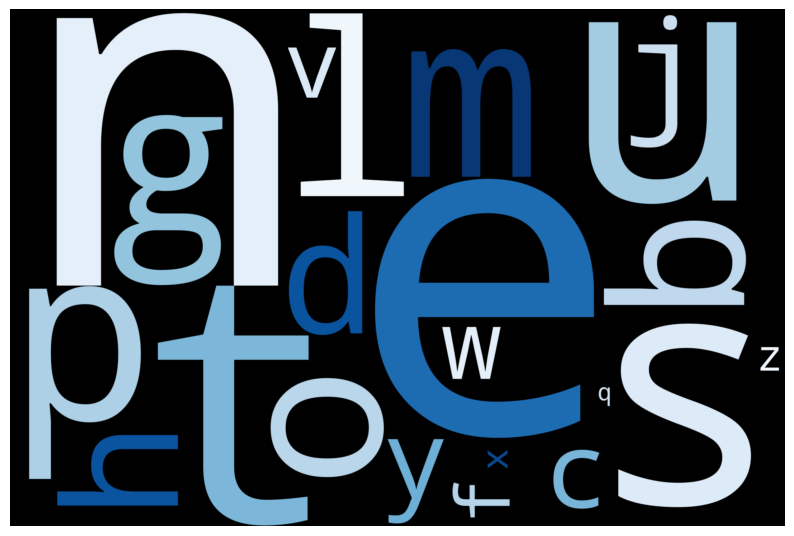

[ ' t a h u   i n f o r m a s i   b a g i   w i l a y a h   j a b a r   d a s a r   l e v e l   3   2   1 ' ,   ' t e m p a t   i b a d a h   w i l a y a h   p p k m   l e v e l   1   k a p a s i t a s   1 0 0   p e r s e n   b a c a   l e n g k a p ' ,   ' j u r u   b i c a r a   s a t g a s   c o v i d - 1 9   w i k u   a d i s a s m i t o   j e l a s   b u k b e r   b o l e h   j a g a   j a r a k   o b r o l   l u p a   c u c i   t a n g a n   m a k a n   b e g i n i   k i r a   g a m b a r   b u k b e r   n g o b r o l   b a g a i m a n a   t a n g g a p   s a h a b a t   v d v c ' ,   ' t a h u   i n f o r m a s i   b a g i   w i l a y a h   j a b a r   d a s a r   l e v e l   4   3   2 ' ,   ' m e n t e r i   a g a m a   t e r b i t   s u r a t   e d a r   n o m o r   0 6   2 0 2 2   l a k s a n a   g i a t   i b a d a t   a g a m a   t e m p a t   i b a d a h   s i m a k   b e r i t a   l e n g k a p ' ,   ' k a p a s i t a s   t e m p a t   i b a d a h   m a s u k   m a s j i 

In [121]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(word_cloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# all_words = ' '.join([tweets for tweets in data["Tweet"]])

all_tweets = []

for tweets in data["Tweet"]:
    try:
        all_tweets.append(tweets)
    except:
        continue
all_words = ' '.join(str(all_tweets))

wordclouda = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)


plot_cloud(wordclouda)
print(all_words)

In [118]:
data

Tweet  label
0      tahu informasi bagi wilayah jabar dasar level ...      1
1      tempat ibadah wilayah ppkm level 1 kapasitas 1...      1
2      juru bicara satgas covid-19 wiku adisasmito je...      1
3      tahu informasi bagi wilayah jabar dasar level ...      1
4      menteri agama terbit surat edar nomor 06 2022 ...      1
...                                                  ...    ...
23559  noelle loses a bet to akarsha and it somehow e...      1
23560                           they call her weekeeshee      1
23561  put out what you wanna see more of amirite gay...      1
23562  i don t need anybody i m fine here on my own b...      1
23563  selamat siang sahabat online nih aku sedikit m...      1

[23564 rows x 2 columns]